# Chargement des données !

Dans notre projet **Classification des panneaux routiers**, nous avons choisi de classifier des images associées à 5 labels différents : **stop**, **crosswalk** , **speedlimit**, **trafficlight**, **no-entry**.



Nous avons réparti nos images dans 3 ensembles (et donc 3 dossiers): *train* (entre 142 et 156 images par classe), *validation* (31 image par classe) et *test* (31 image par classe). Chacun de ces dossiers comporte un sous-dossier par classe, qui contient les images correspondantes.

Nous avons choisi d'héberger notre base de données sur Github : l'intérêt est qu'un **git clone** depuis Google Colab est très rapide, ce qui vous garantit une certaine simplicité. Je vous encourage à en faire de même.

In [29]:
!git clone https://github.com/Abdelmouhaimen/DL-TrafficSignClassification.git
path = "./DL-TrafficSignClassification/data/"

fatal: destination path 'DL-TrafficSignClassification' already exists and is not an empty directory.


Une fois les données téléchargées localement, on peut maintenant charger les images et les labels.

In [30]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat


def load_data(data_path, classes, dataset='train', image_size=64):

    num_images = 0
    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[i]))
        num_images += len(dirs)

    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))

    current_index = 0

    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class]))
        num_images += len(dirs)

        # Chargement des images,
        for idx_img in range(len(dirs)):
            item = dirs[idx_img]
            if os.path.isfile(data_path + dataset + '/' + classes[idx_class] + '/' + item):
                # Ouverture de l'image
                img = Image.open(data_path + dataset + '/' + classes[idx_class] + '/' + item)
                # Conversion de l'image en RGB
                img = img.convert('RGB')
                # Redimensionnement de l'image et écriture dans la variable de retour x
                img = img.resize((image_size,image_size))
                x[current_index] = np.asarray(img)
                # Écriture du label associé dans la variable de retour y
                y[current_index] = idx_class
                current_index += 1
    y = np.squeeze(y)

    return x, y

In [31]:
labels = ['crosswalk', 'no-entry', 'speedlimit','stop','trafficlight']

x_train, y_train = load_data(path, labels, dataset='train', image_size=128)
print(x_train.shape, y_train.shape)

x_val, y_val = load_data(path, labels, dataset='validation', image_size=128)
print(x_val.shape, y_val.shape)

x_test, y_test = load_data(path, labels, dataset='test', image_size=128)
print(x_test.shape, y_test.shape)




(742, 128, 128, 3) (742,)
(154, 128, 128, 3) (154,)
(155, 128, 128, 3) (155,)


In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true , y_pred ,figsize = (12,12) ):
  labels = ['crosswalk', 'no-entry', 'speedlimit','stop','trafficlight']
    # Calculer la matrice de confusion
  conf_matrix = confusion_matrix(y_true, y_pred)

  # Afficher la matrice de confusion sous forme de heatmap
  plt.figure(figsize=figsize)
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Valeurs prédites')
  plt.ylabel('Valeurs réelles')
  plt.title('Matrice de confusion')
  plt.show()




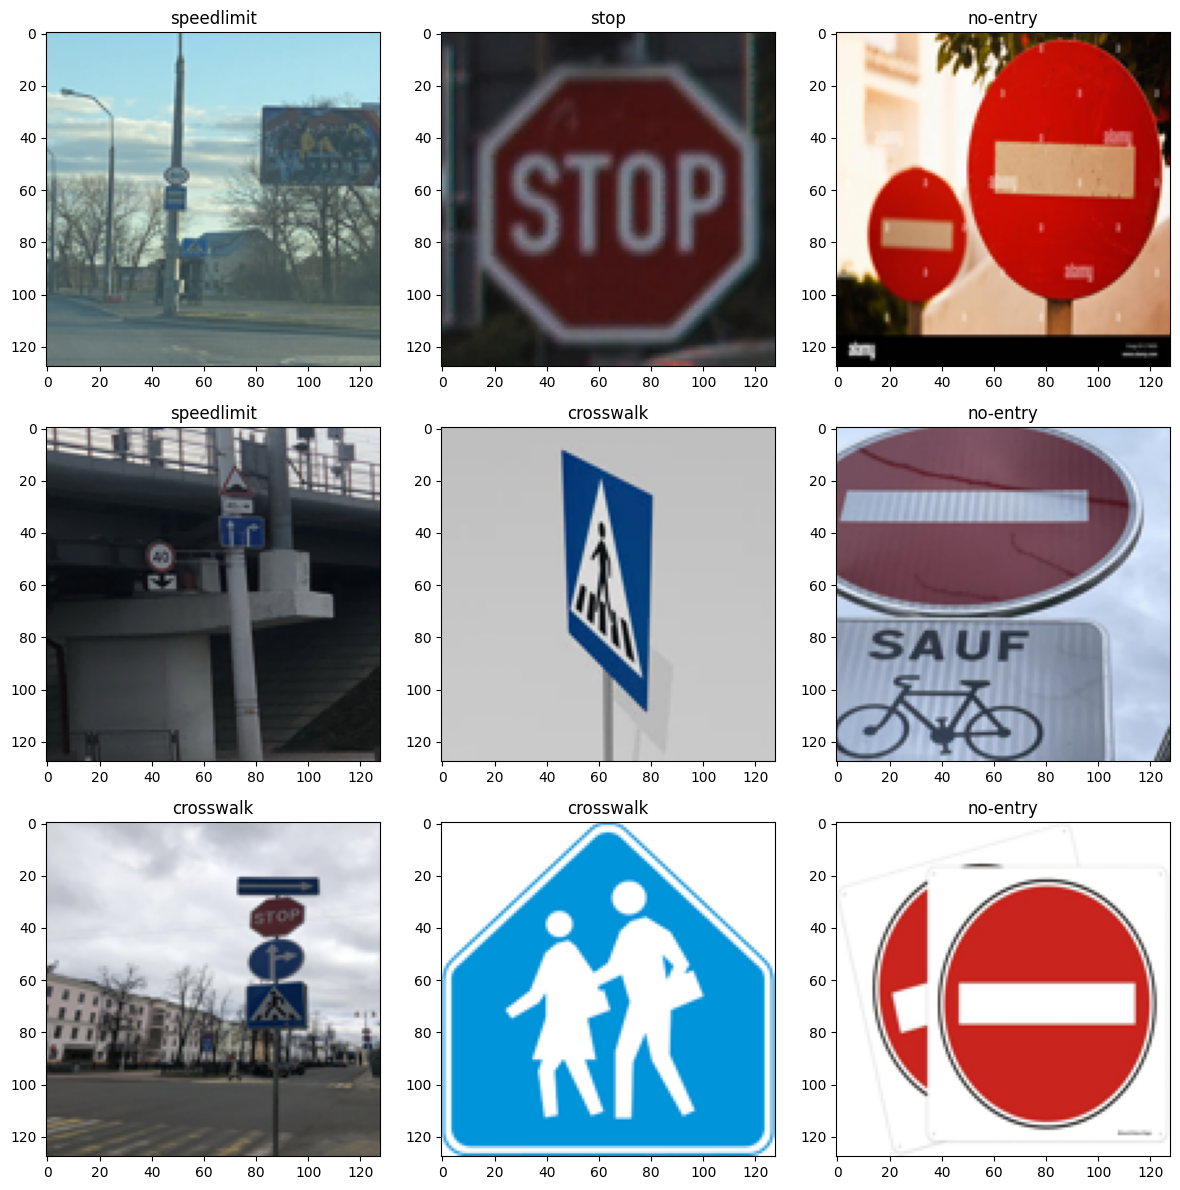

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
shuffle_indices = np.random.permutation(500)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    image = x_train[shuffle_indices[i]]
    plt.title(labels[int(y_train[shuffle_indices[i]])])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.layers import Dense, Flatten,Input

In [35]:
'''
def creat_model (IMAGE_SIZE = 64) :

    model = Sequential()

    model.add(Input((IMAGE_SIZE,IMAGE_SIZE,3)))
    model.add(Conv2D(32,(3,3),padding ="valid" , activation = "ReLU"))
    model.add(MaxPooling2D((2,2)))


    model.add(Conv2D(64,(3,3),padding ="valid", activation = "ReLU"))
    model.add(MaxPooling2D((2,2)))


    model.add(Conv2D(96,(3,3),padding ="valid", activation = "ReLU"))
    model.add(MaxPooling2D((2,2)))


    model.add(Conv2D(128,(3,3),padding ="valid", activation = "ReLU"))
    model.add(MaxPooling2D((2,2)))


    model.add(Flatten())
    model.add(Dense(512,activation = "ReLU"))

    model.add(Dense(5, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # Perte de l'entropie croisée
                  metrics=['sparse_categorical_accuracy' ])  # Métrique de précision

    return model
'''

def creat_model (IMAGE_SIZE = 64 ,nb_cann= 3) :

    model = Sequential()

    model.add(Input((IMAGE_SIZE,IMAGE_SIZE,nb_cann)))
    model.add(Conv2D(32,(3,3),padding ="valid" , activation = "ReLU"))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64,(3,3),padding ="valid", activation = "ReLU"))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(96,(3,3),padding ="valid", activation = "ReLU"))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128,(3,3),padding ="valid", activation = "ReLU"))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512,activation = "ReLU"))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # Perte de l'entropie croisée
                  metrics=['sparse_categorical_accuracy' ])  # Métrique de précision

    return model

In [36]:


def plot_training_analysis(history):
  # Extraction des métriques d'entraînement et de validation depuis l'historique
  acc = history.history['sparse_categorical_accuracy'] # Précision de l'entraînement
  val_acc = history.history['val_sparse_categorical_accuracy']  # Précision de la validation
  loss = history.history['loss']  # Perte de l'entraînement
  val_loss = history.history['val_loss'] # Perte de la validation

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()


#Model 1

In [37]:
# Création d'un modèle
model = creat_model(128)
model.summary()
# Normalisation des entrées via une division par 255 des valeurs de pixel
# Cela ramène les valeurs de pixel dans la plage [0, 1], ce qui aide à stabiliser et accélérer l'apprentissage
x_train = x_train/255
x_val = x_val/255
x_test = x_test/255

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 30, 30, 64)       

In [38]:

# Entraînement du modèle sur les données d'entraînement avec validation sur les données de validation
history = model.fit(x_train,y_train,validation_data=(x_val, y_val), epochs=30)

Epoch 1/30
24/24 [==============================] - 3s 40ms/step - loss: 1.7065 - sparse_categorical_accuracy: 0.2224 - val_loss: 1.6004 - val_sparse_categorical_accuracy: 0.1948
Epoch 2/30
24/24 [==============================] - 1s 27ms/step - loss: 1.5014 - sparse_categorical_accuracy: 0.2898 - val_loss: 1.4886 - val_sparse_categorical_accuracy: 0.3052
Epoch 3/30
24/24 [==============================] - 1s 28ms/step - loss: 1.3011 - sparse_categorical_accuracy: 0.3895 - val_loss: 1.4053 - val_sparse_categorical_accuracy: 0.3117
Epoch 4/30
24/24 [==============================] - 1s 27ms/step - loss: 1.2289 - sparse_categorical_accuracy: 0.4299 - val_loss: 1.2224 - val_sparse_categorical_accuracy: 0.5000
Epoch 5/30
24/24 [==============================] - 1s 29ms/step - loss: 1.1215 - sparse_categorical_accuracy: 0.5000 - val_loss: 1.1167 - val_sparse_categorical_accuracy: 0.5260
Epoch 6/30
24/24 [==============================] - 1s 30ms/step - loss: 1.0448 - sparse_categorical_accu

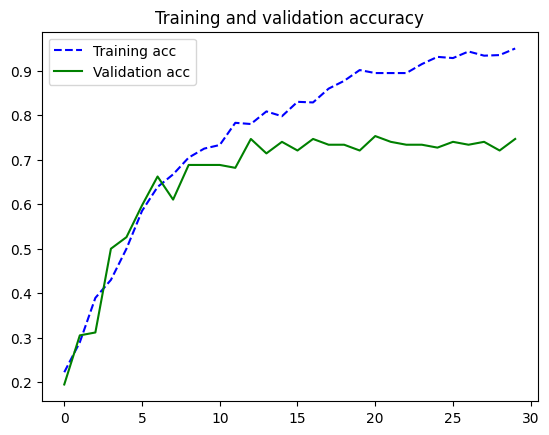

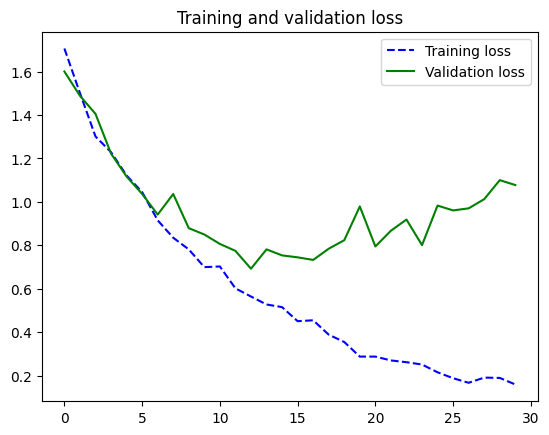

In [39]:
# Appel de la fonction plot_training_analysis pour visualiser les résultats de l'entraînement
plot_training_analysis(history)

In [40]:
# Évaluation du modèle sur les données de test
score = model.evaluate(x_test, y_test, verbose=0)
# Affichage de la perte sur l'ensemble de test
# score[0] contient la valeur de la perte
print('Test loss      : {:5.4f}'.format(score[0]))
# Affichage de la précision sur l'ensemble de test
# score[1] contient la valeur de la précision
print('Test accuracy  : {:5.4f}'.format(score[1]))

Test loss      : 0.8363
Test accuracy  : 0.7677


5/5 [==============================] - 0s 8ms/step


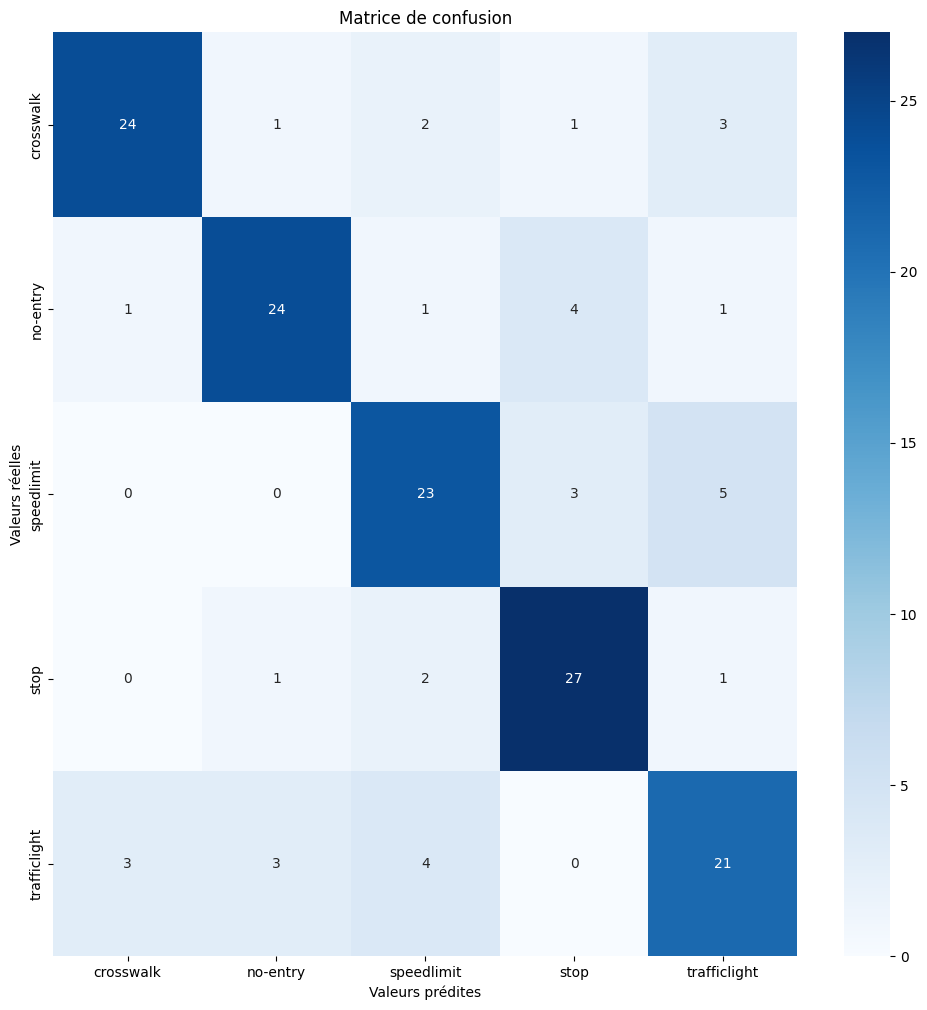

In [41]:

# Prédiction des classes pour les données de test
y_pred_indices = model.predict(x_test)
# Conversion des probabilités en classes prédictes
y_pred    = np.argmax(y_pred_indices, axis=-1)
#Tracé de la matrice de confusion pour comparer les étiquettes réelles (y_test) et les prédictions (y_pred)
plot_confusion_matrix(y_test , y_pred ,figsize = (12,12) )

In [42]:
from sklearn.metrics import classification_report
# Obtenez le rapport de classification
class_report = classification_report(y_test, y_pred)

# Imprimez le rapport de classification
print(class_report)

              precision    recall  f1-score   support

         0.0       0.86      0.77      0.81        31
         1.0       0.83      0.77      0.80        31
         2.0       0.72      0.74      0.73        31
         3.0       0.77      0.87      0.82        31
         4.0       0.68      0.68      0.68        31

    accuracy                           0.77       155
   macro avg       0.77      0.77      0.77       155
weighted avg       0.77      0.77      0.77       155



#Model 2

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Création d'un générateur d'images pour augmenter les données d'entraînement
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

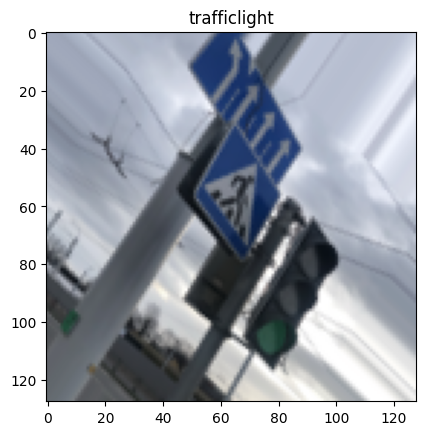

In [44]:
example_x, example_y = train_datagen.flow(x_train, y_train, batch_size=1).next()
example_x.shape
for i in range(0,1):
    plt.imshow(example_x[i])
    plt.title(labels[int(example_y[i])])
    plt.show()


In [51]:
from tensorflow import keras
# Définition du chemin où enregistrer le meilleur modèle
# Création d'un modèle
model = creat_model(128)

checkpoint_filepath = "/models/best-model.keras"


# Définition du callback d'arrêt anticipé
early_stopping_callback =keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
)

# Définition du callback pour sauvegarder le meilleur modèle
bestmodel_callback = keras.callbacks.ModelCheckpoint(
                                filepath=  checkpoint_filepath,
                                monitor='val_sparse_categorical_accuracy',
                                mode='max',
                                save_best_only=True,
                                save_weights_only=True)

#Les poids du modèle sont sauvegardés à la fin de chaque époque, s'ils sont les meilleurs observés jusqu'à présent

history = model.fit(train_datagen.flow(x_train, y_train, batch_size=10),
                    validation_data=(x_val, y_val),
                    epochs=70,
                    callbacks = [bestmodel_callback])


# Chargement des poids du meilleur modèle sauvegardé
model.load_weights(checkpoint_filepath)

Epoch 1/70
75/75 [==============================] - 7s 63ms/step - loss: 1.6459 - sparse_categorical_accuracy: 0.2022 - val_loss: 1.5849 - val_sparse_categorical_accuracy: 0.1753
Epoch 2/70
75/75 [==============================] - 4s 53ms/step - loss: 1.3599 - sparse_categorical_accuracy: 0.3693 - val_loss: 1.1647 - val_sparse_categorical_accuracy: 0.4545
Epoch 3/70
75/75 [==============================] - 5s 62ms/step - loss: 1.2451 - sparse_categorical_accuracy: 0.4097 - val_loss: 1.3069 - val_sparse_categorical_accuracy: 0.3571
Epoch 4/70
75/75 [==============================] - 3s 44ms/step - loss: 1.1561 - sparse_categorical_accuracy: 0.4677 - val_loss: 1.0177 - val_sparse_categorical_accuracy: 0.5714
Epoch 5/70
75/75 [==============================] - 3s 44ms/step - loss: 1.0814 - sparse_categorical_accuracy: 0.5108 - val_loss: 0.9836 - val_sparse_categorical_accuracy: 0.5584
Epoch 6/70
75/75 [==============================] - 3s 46ms/step - loss: 1.0767 - sparse_categorical_accu

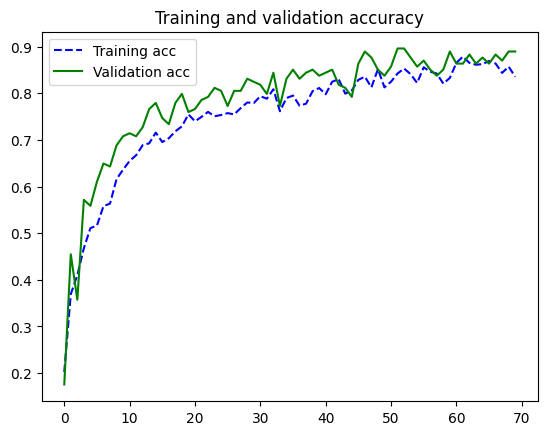

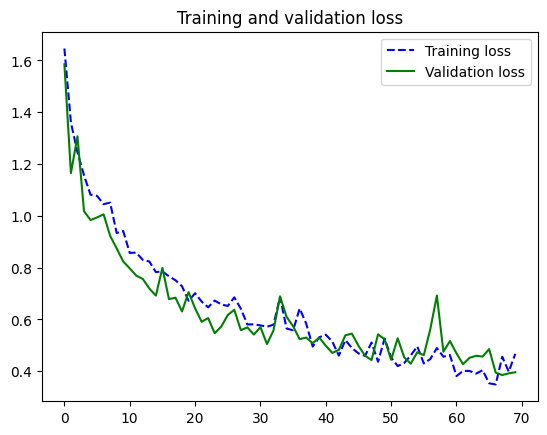

In [52]:
plot_training_analysis(history)

In [53]:
# Évaluation du modèle sur les données de test
score = model.evaluate(x_test, y_test, verbose=0)
# Affichage de la perte sur l'ensemble de test
# score[0] contient la valeur de la perte
print('Test loss      : {:5.4f}'.format(score[0]))
# Affichage de la précision sur l'ensemble de test
# score[1] contient la valeur de la précision
print('Test accuracy  : {:5.4f}'.format(score[1]))

Test loss      : 0.4147
Test accuracy  : 0.8710


5/5 [==============================] - 0s 7ms/step


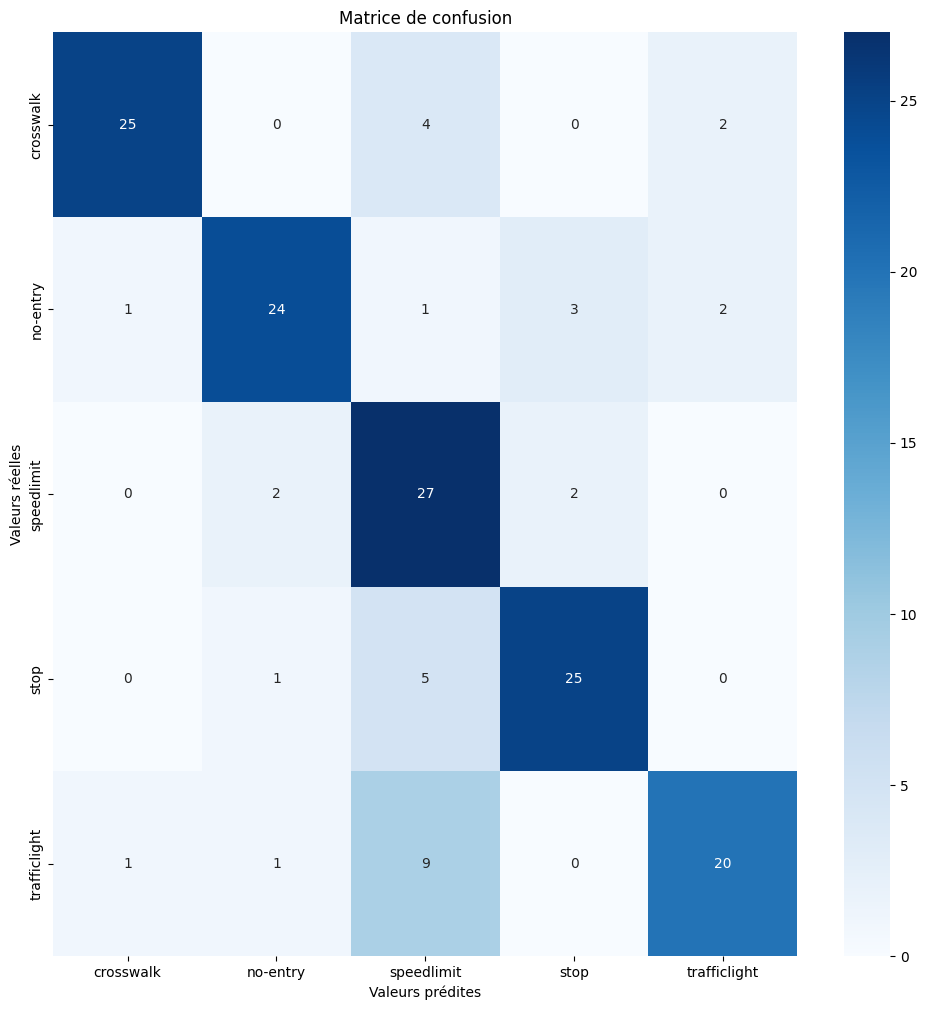

In [48]:
y_pred_indices = model.predict(x_test)

y_pred    = np.argmax(y_pred_indices, axis=-1)
plot_confusion_matrix(y_test , y_pred ,figsize = (12,12) )

In [49]:
from sklearn.metrics import classification_report
# Obtenez le rapport de classification
class_report = classification_report(y_test, y_pred)

# Imprimez le rapport de classification
print(class_report)

              precision    recall  f1-score   support

         0.0       0.93      0.81      0.86        31
         1.0       0.86      0.77      0.81        31
         2.0       0.59      0.87      0.70        31
         3.0       0.83      0.81      0.82        31
         4.0       0.83      0.65      0.73        31

    accuracy                           0.78       155
   macro avg       0.81      0.78      0.78       155
weighted avg       0.81      0.78      0.78       155



# Model 3 :Fine-tuning

In [50]:
from tensorflow.keras.applications import VGG16

# Création d'un modèle
model = creat_model(128)

IMAGE_SIZE = 128

# Chargement de la base convolutive VGG16 avec les poids pré-entraînés sur ImageNet
conv_base = VGG16(weights='imagenet', # On utilise les poids du réseau déjà pré-entrainé sur la base de données ImageNet
                  include_top=False, # On ne conserve pas la partie Dense du réseau originel
                  input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

model = Sequential()
# Ajout de la base convolutive VGG16 au modèle
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='ReLU'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
# Désactivation de l'entraînement des couches de la base convolutive VGG16
conv_base.trainable = False

bestmodel_callback = keras.callbacks.ModelCheckpoint(
                                filepath=  checkpoint_filepath,
                                monitor='val_sparse_categorical_accuracy',
                                mode='max',
                                save_best_only=True)

model.compile(optimizer=optimizers.Adam(learning_rate=3e-4),
              loss='sparse_categorical_crossentropy',  # Perte de l'entropie croisée
              metrics=[keras.metrics.SparseCategoricalAccuracy()])  # Métrique de précision


history = model.fit(train_datagen.flow(x_train, y_train, batch_size=10),
                    validation_data=(x_val, y_val),
                    epochs=10,
                    callbacks = [bestmodel_callback])

# The model weights (that are considered the best) can be loaded
model.load_weights(checkpoint_filepath)

Epoch 1/10
75/75 [==============================] - 7s 71ms/step - loss: 1.1862 - sparse_categorical_accuracy: 0.5499 - val_loss: 0.7451 - val_sparse_categorical_accuracy: 0.7468
Epoch 2/10
75/75 [==============================] - 4s 49ms/step - loss: 0.7881 - sparse_categorical_accuracy: 0.6927 - val_loss: 0.8031 - val_sparse_categorical_accuracy: 0.7143
Epoch 3/10
75/75 [==============================] - 5s 72ms/step - loss: 0.6338 - sparse_categorical_accuracy: 0.7722 - val_loss: 0.5722 - val_sparse_categorical_accuracy: 0.8247
Epoch 4/10
75/75 [==============================] - 4s 53ms/step - loss: 0.5788 - sparse_categorical_accuracy: 0.7898 - val_loss: 0.5768 - val_sparse_categorical_accuracy: 0.8052
Epoch 5/10
75/75 [==============================] - 5s 67ms/step - loss: 0.5323 - sparse_categorical_accuracy: 0.8046 - val_loss: 0.5827 - val_sparse_categorical_accuracy: 0.8117
Epoch 6/10
75/75 [==============================] - 4s 48ms/step - loss: 0.4868 - sparse_categorical_accu

In [23]:
# Activer l'entraînement des couches de la base convolutive VGG16
conv_base.trainable = True
model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',  # Perte de l'entropie croisée
              metrics=[keras.metrics.SparseCategoricalAccuracy()])  # Métrique de précision


history = model.fit(train_datagen.flow(x_train, y_train, batch_size=10),
                    validation_data=(x_val, y_val),
                    epochs=10,
                    callbacks = [bestmodel_callback])

# The model weights (that are considered the best) can be loaded as -
model.load_weights(checkpoint_filepath)

Epoch 1/10
75/75 [==============================] - 19s 149ms/step - loss: 0.3820 - sparse_categorical_accuracy: 0.8706 - val_loss: 0.4908 - val_sparse_categorical_accuracy: 0.8701
Epoch 2/10
75/75 [==============================] - 9s 115ms/step - loss: 0.3370 - sparse_categorical_accuracy: 0.8706 - val_loss: 0.5513 - val_sparse_categorical_accuracy: 0.8701
Epoch 3/10
75/75 [==============================] - 10s 135ms/step - loss: 0.2527 - sparse_categorical_accuracy: 0.9043 - val_loss: 0.5347 - val_sparse_categorical_accuracy: 0.8961
Epoch 4/10
75/75 [==============================] - 7s 94ms/step - loss: 0.2421 - sparse_categorical_accuracy: 0.9111 - val_loss: 0.5618 - val_sparse_categorical_accuracy: 0.8701
Epoch 5/10
75/75 [==============================] - 7s 98ms/step - loss: 0.2022 - sparse_categorical_accuracy: 0.9367 - val_loss: 0.5085 - val_sparse_categorical_accuracy: 0.9091
Epoch 6/10
75/75 [==============================] - 6s 85ms/step - loss: 0.1800 - sparse_categorical

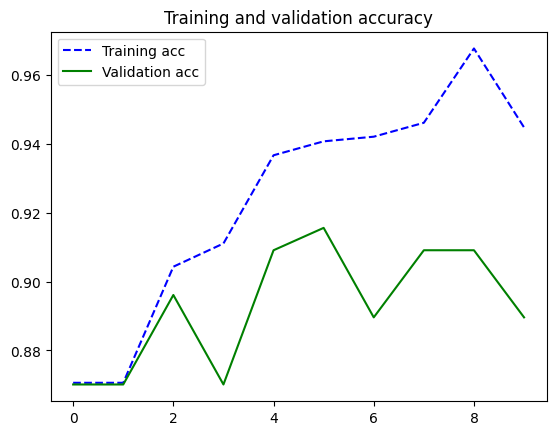

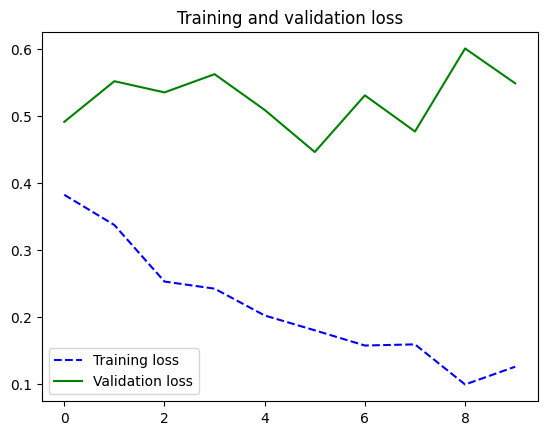

In [24]:
plot_training_analysis(history)

In [25]:
# Évaluation du modèle sur les données de test
score = model.evaluate(x_test, y_test, verbose=0)
# Affichage de la perte sur l'ensemble de test
# score[0] contient la valeur de la perte
print('Test loss      : {:5.4f}'.format(score[0]))
# Affichage de la précision sur l'ensemble de test
# score[1] contient la valeur de la précision
print('Test accuracy  : {:5.4f}'.format(score[1]))

Test loss      : 0.2766
Test accuracy  : 0.9355


5/5 [==============================] - 0s 54ms/step


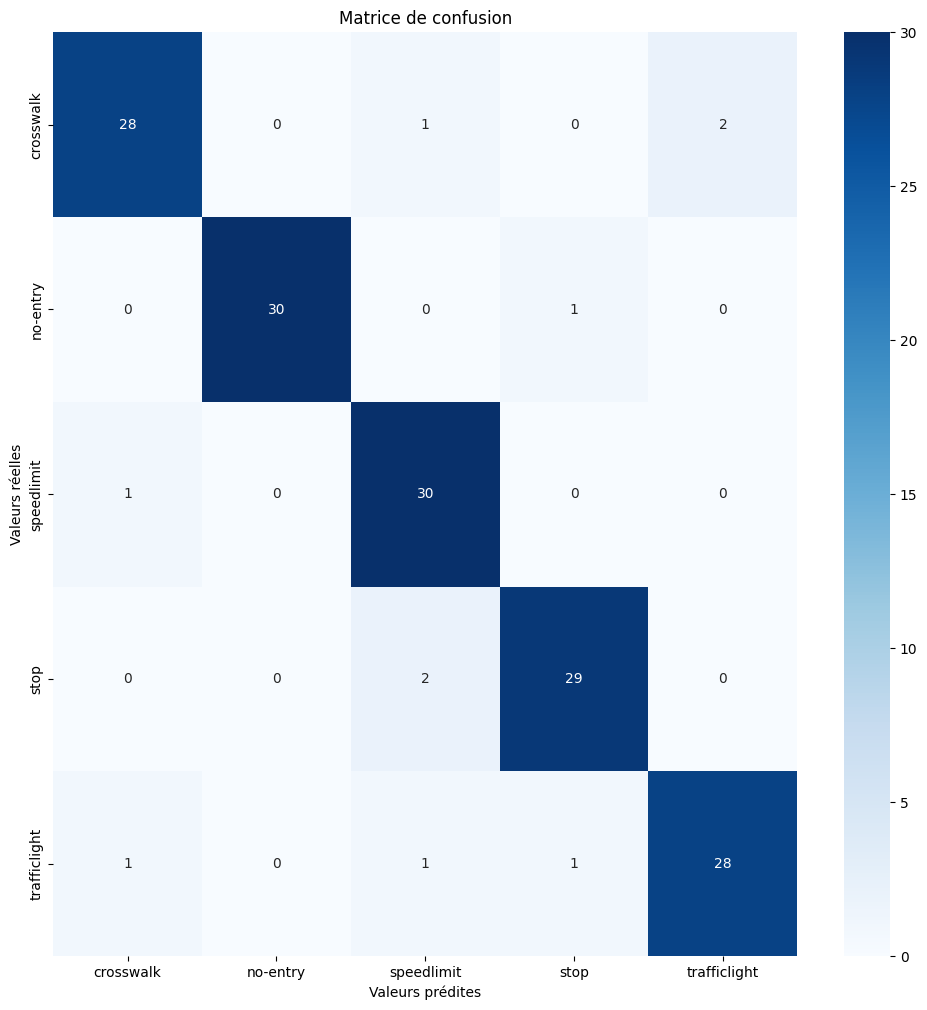

In [26]:
y_pred_indices = model.predict(x_test)

y_pred    = np.argmax(y_pred_indices, axis=-1)
plot_confusion_matrix(y_test , y_pred ,figsize = (12,12) )

In [27]:
from sklearn.metrics import classification_report
# Obtenez le rapport de classification
class_report = classification_report(y_test, y_pred)

# Imprimez le rapport de classification
print(class_report)

              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92        31
         1.0       1.00      0.97      0.98        31
         2.0       0.88      0.97      0.92        31
         3.0       0.94      0.94      0.94        31
         4.0       0.93      0.90      0.92        31

    accuracy                           0.94       155
   macro avg       0.94      0.94      0.94       155
weighted avg       0.94      0.94      0.94       155



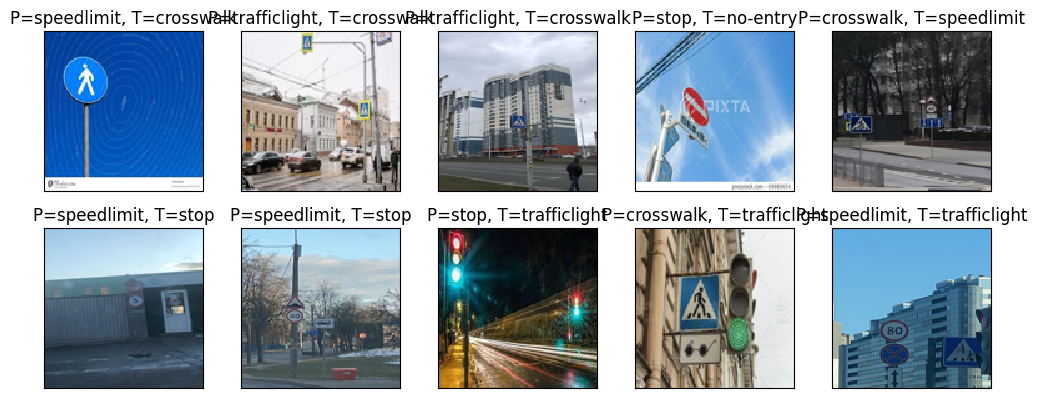

In [28]:
# Obtenir les indices des prédictions erronées
incorrect_indices = np.where(y_pred != y_test)[0]

# Afficher les images correspondantes
plt.figure(figsize=(10, 10))
for i, incorrect in enumerate(incorrect_indices[:25]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[incorrect], cmap='gray', interpolation='none')
    plt.title("P={}, T={}".format(labels[y_pred[incorrect].astype(np.uint8)], labels[y_test[incorrect].astype(np.uint8)]))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()